# Visual Data Exploration with Matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data1 = np.random.normal(0, 0.1, 1000)
data2 = np.random.normal(1, 0.4, 1000) + np.linspace(0, 1, 1000)
data3 = 2 + np.random.random(1000) * np.linspace(1, 5, 1000)
data4 = np.random.normal(3, 0.2, 1000) + 0.3 * np.sin(np.linspace(0, 20, 1000))

In [3]:
data = np.vstack([data1, data2, data3, data4]).transpose()
data

array([[-0.07305957,  0.44447611,  2.07304439,  2.92644877],
       [-0.17636413,  0.5542899 ,  2.23508481,  3.0111521 ],
       [ 0.05912394,  0.83202255,  2.13845708,  2.66057953],
       ...,
       [ 0.03071688,  2.11655044,  4.85211334,  3.15715159],
       [-0.05905687,  2.13553702,  6.49373731,  3.36304603],
       [ 0.12643744,  2.19713223,  6.93832887,  3.09959987]])

In [4]:
df = pd.DataFrame(data, columns=['data1', 'data2', 'data3', 'data4'])
df.head()

,data1,data2,data3,data4
0,-0.073060,0.444476,2.073044,2.926449
1,-0.176364,0.554290,2.235085,3.011152
2,0.059124,0.832023,2.138457,2.660580
3,0.097618,1.748091,2.791555,2.965790
4,-0.088417,0.810885,2.996100,2.965143


# Line Plot


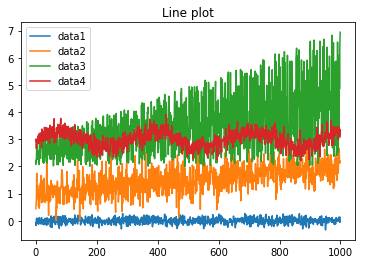

In [5]:
df.plot(title='Line plot')

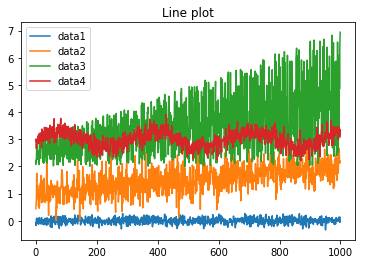

In [6]:
plt.plot(df)
plt.title('Line plot')
plt.legend(['data1', 'data2', 'data3', 'data4'])

# Scatter plt

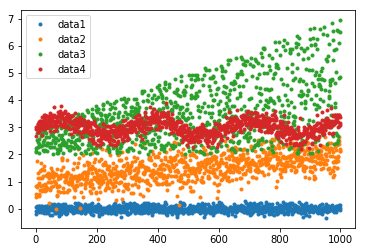

In [7]:
df.plot(style='.')

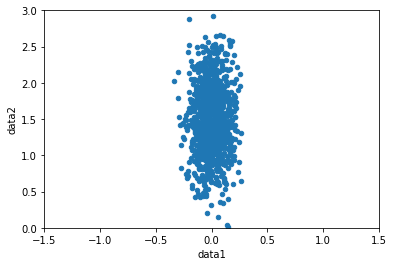

In [8]:
_ = df.plot(kind='scatter', x='data1', y='data2',
            xlim=(-1.5, 1.5), ylim=(0, 3))

# histogram


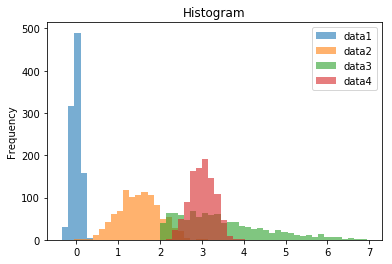

In [9]:
df.plot(kind='hist',
        bins=50,
        title='Histogram',
        alpha=0.6)

# Cumulative distribution

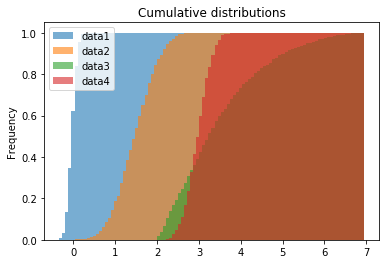

In [10]:
df.plot(kind='hist',
        bins=100,
        title='Cumulative distributions',
        normed=True,
        cumulative=True,
        alpha=0.6)

# Box Plot

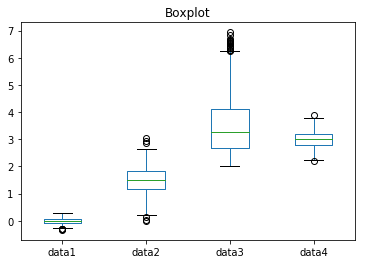

In [11]:
df.plot(kind='box',title='Boxplot')

# Subplots

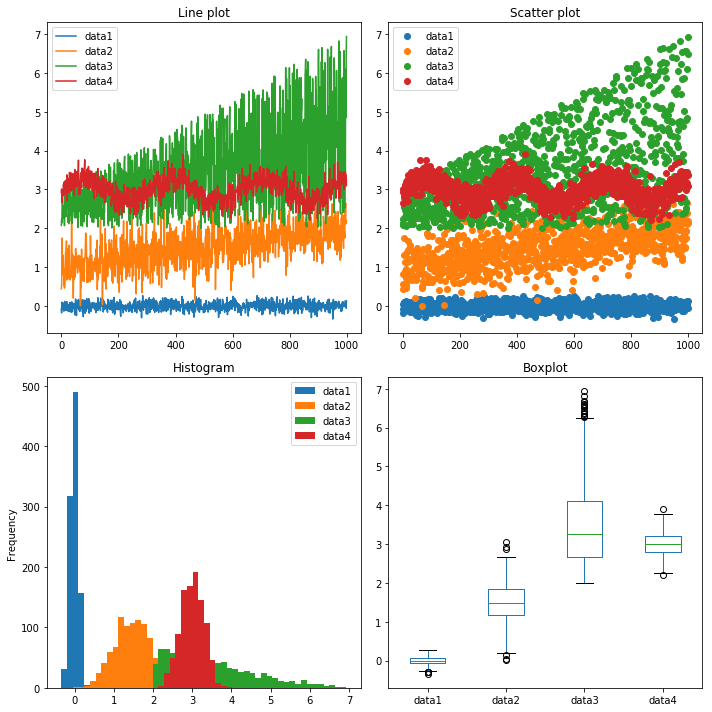

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

df.plot(ax=ax[0][0],
        title='Line plot')

df.plot(ax=ax[0][1],
        style='o',
        title='Scatter plot')

df.plot(ax=ax[1][0],
        kind='hist',
        bins=50,
        title='Histogram')

df.plot(ax=ax[1][1],
        kind='box',
        title='Boxplot')

plt.tight_layout()

# Pie charts

In [13]:
gt01 = df['data1'] > 0.1
piecounts = gt01.value_counts()
piecounts

False    843
True     157
Name: data1, dtype: int64

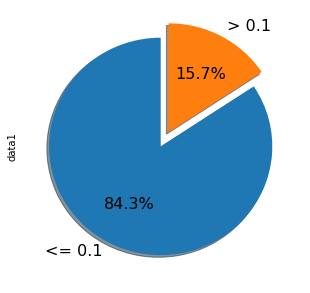

In [14]:
piecounts.plot(kind='pie',
               figsize=(5, 5),
               explode=[0, 0.15],
               labels=['<= 0.1', '> 0.1'],
               autopct='%1.1f%%',
               shadow=True,
               startangle=90,
               fontsize=16)

# Hexbin plot

In [15]:
data = np.vstack([np.random.normal((0, 0), 2, size=(1000, 2)),
                  np.random.normal((9, 9), 3, size=(2000, 2))])
df = pd.DataFrame(data, columns=['x', 'y'])
df.head()

,x,y
0,2.068209,-2.493356
1,-1.129117,3.767529
2,1.876523,0.267624
3,0.407068,0.841150
4,-1.354906,4.484094


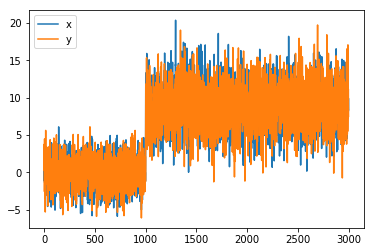

In [16]:
df.plot()

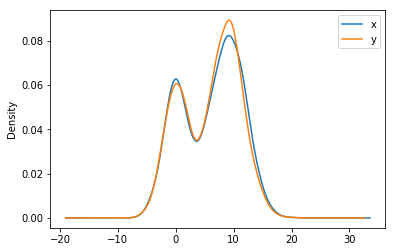

In [17]:
df.plot(kind='kde')

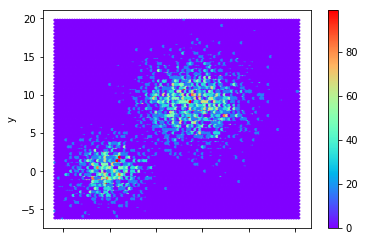

In [18]:
df.plot(kind='hexbin', x='x', y='y', bins=100, cmap='rainbow')

# Unstructured data

In [19]:
from PIL import Image

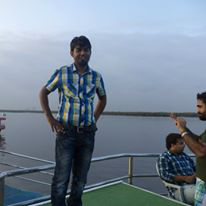

In [37]:
img = Image.open('./data/nasir.jpg')
img

In [21]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [22]:
imgarray = np.asarray(img)

In [23]:
type(imgarray)

numpy.ndarray

In [24]:
imgarray.shape

(206, 206, 3)

In [25]:
imgarray.ravel().shape

(127308,)

In [26]:
206*206* 3

127308

# Sound

In [27]:
from scipy.io import wavfile

In [28]:
rate, snd = wavfile.read(filename='./data/sms.wav')

In [29]:
from IPython.display import Audio

In [30]:
Audio(data=snd, rate=rate)

In [31]:
len(snd)

110250

In [32]:
snd

array([70, 14, 27, ..., 58, 68, 59], dtype=int16)

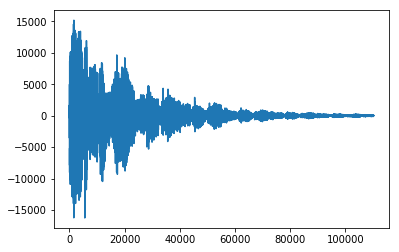

In [33]:
plt.plot(snd)

Text(0.5,0,'Time (s)')

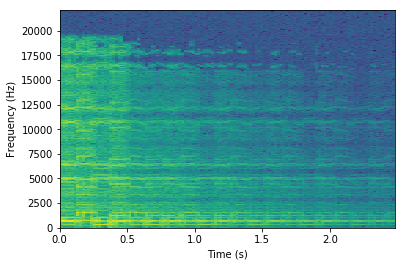

In [34]:
_ = plt.specgram(snd, NFFT=1024, Fs=44100)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')